In [1]:
import modules.labelHelper as lh 
import modules.featureHelper as fh
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

Import an awesome Label helper
import an awesome feature helper


In [2]:
ll=lh.Label('..//2019_fall_labels.csv')

print("There are %d videos in total\n"%ll.video_count())

ll.get_trainee_info()

There are 83 videos in total

There are 19 trainees in total

 Number of Videos from each person
Akhtar          -- [176 253 761] ----: 3
Cadeddu         -- [164 171] ----: 2
Crivelli        -- [225 276 333 425] ----: 4
Gahan           -- [257 345 378 384 486] ----: 5
Johnson         -- [441 615] ----: 2
Keith           -- [240 277 717] ----: 3
Kenigsberg      -- [ 78 440 455 471 881] ----: 5
Krabbe          -- [152 344 527 861] ----: 4
Marthur         -- [130 194 222 368 921] ----: 5
Mollengarden    -- [ 59 143 267 460] ----: 4
Moony           -- [294 301 361 498 539] ----: 5
Passoni         -- [207 237 895 942] ----: 4
Rozanski        -- [113 302 716] ----: 3
Satyanarayan    -- [ 16  74 236 358 436 457 503 537 557 578 599 632 689] ----: 13
Singla          -- [ 49 536 538] ----: 3
Sorokin         -- [ 91 226 507 530] ----: 4
Timburlake      -- [258 296 559 742] ----: 4
Tse             -- [ 11 283 414 427 562 928] ----: 6
Varun           -- [192 401 417 820] ----: 4


In [3]:
print(ll.video_count())
ll.get_video_number()

83


array([ 11,  16,  49,  59,  74,  78,  91, 113, 130, 143, 152, 164, 171,
       176, 192, 194, 207, 222, 225, 226, 236, 237, 240, 253, 257, 258,
       267, 276, 277, 283, 294, 296, 301, 302, 333, 344, 345, 358, 361,
       368, 378, 384, 401, 414, 417, 425, 427, 436, 440, 441, 455, 457,
       460, 471, 486, 498, 503, 507, 527, 530, 536, 537, 538, 539, 557,
       559, 562, 578, 599, 615, 632, 689, 716, 717, 742, 761, 820, 861,
       881, 895, 921, 928, 942], dtype=int64)

In [4]:
print("median label: ",ll.get_video_median_label_by_video_number(11))
print("mean label: ",ll.get_video_mean_label_by_video_number(11))

median label:  [3. 2. 2. 2. 4. 3.]
mean label:  [2.85714286 2.28571429 2.28571429 2.         3.14285714 2.57142857]


In [5]:
MAX,MIN=ll.get_video_score_range_by_video_number(11)
print(MAX)
print(MIN)
print("\nThis video has %d reviewers"%ll.get_review_times_by_video_number(11))

   VideoNum  DP  BD  E  FS  A  RC lastName
0        11   4   3  3   3  4   3      Tse
   VideoNum  DP  BD  E  FS  A  RC lastName
0        11   1   1  1   1  1   1      Tse

This video has 7 reviewers


In [6]:
train_video_number,test_video_number=ll.train_test_split_on_people(0.2)
print(train_video_number)
print(test_video_number)

train on videos from:
 ['Marthur', 'Kenigsberg', 'Singla', 'Sorokin', 'Satyanarayan', 'Krabbe', 'Varun', 'Cadeddu', 'Tse', 'Akhtar', 'Rozanski', 'Keith', 'Mollengarden', 'Moony', 'Crivelli']
test on videos from:
 ['Timburlake', 'Gahan', 'Passoni', 'Johnson']
[130 194 222 368 921  78 440 455 471 881  49 536 538  91 226 507 530  16
  74 236 358 436 457 503 537 557 578 599 632 689 152 344 527 861 192 401
 417 820 164 171  11 283 414 427 562 928 176 253 761 113 302 716 240 277
 717  59 143 267 460 294 301 361 498 539 225 276 333 425]
[258 296 559 742 257 345 378 384 486 207 237 895 942 441 615]


In [7]:
folder = "C:\\2019_fall_video_features"
video_clips_length=30
time_lag=2
move_threshold=150
stride=video_clips_length


In [8]:
# train test split by people
train_video,train_video_label=fh.make_train_test_data_from_video_numbers(folder,train_video_number,video_clips_length,time_lag,move_threshold,stride,ll)
test_video,test_video_label=fh.make_train_test_data_from_video_numbers(folder,test_video_number,video_clips_length,time_lag,move_threshold,stride,ll)
print(train_video.shape)
print(train_video_label.shape)
print(test_video.shape)
print(test_video_label.shape)

load feature from files, there are 68 videos
after deop:  68
load feature from files, there are 15 videos
after deop:  15
(2227, 30, 28)
(2227, 6)
(475, 30, 28)
(475, 6)


In [9]:
# train test split by ratio
train_video,train_video_label,test_video,test_video_label=fh.make_train_test_data_split_by_video_ratio(folder,ll,video_clips_length,time_lag,move_threshold,stride,0.2)
print(train_video.shape)
print(train_video_label.shape)
print(test_video.shape)
print(test_video_label.shape)

before deop we have 83 videos
load feature from files, there are 83 videos
after deop:  83
we have 83 video after drop
(2414, 30, 28)
(2414, 6)
(288, 30, 28)
(288, 6)


In [10]:
review_times=[ll.get_review_times_by_video_number(i) for i in ll.get_video_number()]


In [11]:
import matplotlib.pyplot as plt

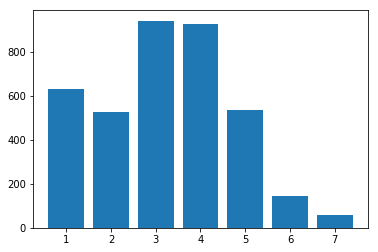

In [12]:
p1 = plt.bar(review_times, ll.get_video_number())

Text(0.5,0,'Number of reviewer')

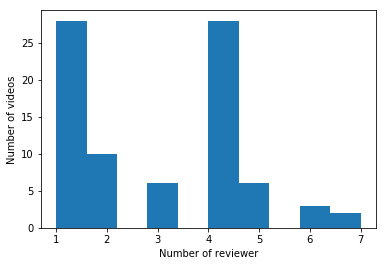

In [13]:
plt.hist(x=review_times)
plt.ylabel('Number of videos')
plt.xlabel('Number of reviewer')